In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
transforms = {c : graphiclog.utils.string2array for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]"


In [24]:
beds['grain_size_psi'] = beds['grain_size_mm'].apply(graphiclog.wentworth.gs2psi)
beds['mean_gs_psi'] = beds['mean_gs_mm'].apply(graphiclog.wentworth.gs2psi)

for i, row in beds.iterrows():
    len_ds = len(row['depth_m'])
    len_gs = len(row['grain_size_psi'])
    
    if len_ds != len_gs:
        if len_ds > 0:
            print(f'Weird row: {row}')
        else:
            beds.at[i, 'depth_m'] = np.array([row['tops'], beds.at[i+1, 'tops']])

beds

Weird row: name                                             Marnoso 1
count                                                    1
collection                                Marnoso-Arenacea
eod                                            basin plain
eodnum                                                   0
tops                                               0.81695
th                                                 0.81695
gs_tops_mm                                           0.001
snd_shl                                                  0
mean_gs_mm                                           0.001
max_gs_mm                                            0.001
ng                                                0.520514
ar                                                0.021978
depth_m                                          [0.81695]
grain_size_mm                               [0.001, 0.001]
grain_size_psi    [-9.965784284662087, -9.965784284662087]
mean_gs_psi                                  

Weird row: name                                                          Fan 1
count                                                            89
collection                                                  Nigeria
eod                                                             fan
eodnum                                                            1
tops                                                       0.813604
th                                                        0.0130047
gs_tops_mm                                                        1
snd_shl                                                           1
mean_gs_mm                                                 0.968782
max_gs_mm                                                         1
ng                                                        0.0267829
ar                                                         0.111111
depth_m           [0.8136039, 0.8136039, 0.8144167, 0.8152295, 0...
grain_size_mm                        

Weird row: name                                            Karoo krf1
count                                                  145
collection                                           Karoo
eod                                                    fan
eodnum                                                   1
tops                                            0.00140912
th                                              0.00140912
gs_tops_mm                                      0.00927135
snd_shl                                                  0
mean_gs_mm                                      0.00927135
max_gs_mm                                       0.00927135
ng                                                0.772615
ar                                                0.104762
depth_m                                      [0.001409118]
grain_size_mm                   [0.009271353, 0.009271353]
grain_size_psi    [-6.753004393065342, -6.753004393065342]
mean_gs_psi                                  

Weird row: name                                            Cap Ste-Anne sta800
count                                                           221
collection                                                 Tourelle
eod                                                             fan
eodnum                                                            1
tops                                                        1.41686
th                                                          1.41686
gs_tops_mm                                                 0.287546
snd_shl                                                           1
mean_gs_mm                                                 0.287546
max_gs_mm                                                  0.287546
ng                                                                1
ar                                                         0.962963
depth_m                                       [1.416863, 0.1645265]
grain_size_mm                     [0.

Weird row: name                                                       VACA3VV3
count                                                           271
collection                                               Tres Pasos
eod                                                    slopechannel
eodnum                                                            2
tops                                                             81
th                                                          0.20135
gs_tops_mm                                                 0.236427
snd_shl                                                           1
mean_gs_mm                                                 0.276325
max_gs_mm                                                  0.289578
ng                                                         0.852217
ar                                                         0.496732
depth_m                    [80.96603, 80.90534, 80.83707, 80.79865]
grain_size_mm     [0.2364272, 0.26334

Weird row: name                                                   mm2
count                                                  296
collection                                      Tres Pasos
eod                                           slopechannel
eodnum                                                   2
tops                                             0.0863959
th                                               0.0863959
gs_tops_mm                                          0.0075
snd_shl                                                  0
mean_gs_mm                                          0.0075
max_gs_mm                                           0.0075
ng                                                0.724352
ar                                                0.135593
depth_m                                       [0.08639587]
grain_size_mm                             [0.0075, 0.0075]
grain_size_psi    [-7.058893689053568, -7.058893689053568]
mean_gs_psi                                  

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm,grain_size_psi,mean_gs_psi
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.816840,0.310820,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]","[-3.119654571657641, -3.111384619725125, -3.09...",-3.106893
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.506020,0.609310,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.896710,0.104630,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]","[-2.9956254626405614, -2.9956254626405614]",-2.995625
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.792080,0.116940,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.675140,0.132320,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]","[-2.896405411761795, -2.7889100339494175, -2.6...",-2.736260
5,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.542820,0.390820,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.54282, 21.152]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
6,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.152000,0.058470,0.138211,1.0,0.138211,0.138211,0.520514,0.021978,"[21.152, 21.09353]","[0.1382106, 0.1382106]","[-2.855059828068643, -2.855059828068643]",-2.855060
7,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.093530,0.387750,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.09353, 20.70578]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
8,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,20.705780,0.024620,0.145527,1.0,0.145527,0.145527,0.520514,0.021978,"[20.70578, 20.68116]","[0.1455271, 0.1455271]","[-2.7806402586262107, -2.7806402586262107]",-2.780640
9,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,20.681160,0.184640,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[20.68116, 20.49652]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784


In [4]:
beds['mean_gs_psi'].isna().any()

True

In [9]:
seqs = []

bad_names = []

for i, (name, grp) in enumerate(beds.groupby('name')):
    if grp['mean_gs_psi'].isna().any():
        bad_names.append(name)
        continue
    
    bedseq = graphiclog.BedSequence.from_dataframe(grp, topcol='tops', thickcol='th',
                                         component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                         datacols=['th', 'mean_gs_psi', 'depth_m', 'grain_size_psi'],
                                         metacols=['name', 'collection', 'eod', 'eodnum'], eps=1e-2)
    
    seqs.append(bedseq)

elev_gap: 87.42309000000004
depth_gap: 5.826450433232822e-13
elev_gap: 77.5307999999996
depth_gap: 1.1652900866465643e-12
elev_gap: 247.51730000000023
depth_gap: 1.6484591469634324e-12
elev_gap: 6.181948457482204
depth_gap: 1.9984014443252818e-14
elev_gap: 7.34177496929225
depth_gap: 1.7763568394002505e-15
elev_gap: 4.126032848716932e-12
depth_gap: 63.02854246888152
elev_gap: 7.159064049829487
depth_gap: 1.1102230246251565e-13
elev_gap: 5.624514444234812
depth_gap: 3.419486915845482e-14
elev_gap: 3.574655278286819
depth_gap: 1.3322676295501878e-15
elev_gap: 9.17871781902925
depth_gap: 5.295763827461997e-14
elev_gap: 6.355213647322664
depth_gap: 3.352873534367973e-13
elev_gap: 9.828270037526982
depth_gap: 3.207434318142077e-13
elev_gap: 3.240074875066057e-12
depth_gap: 242.18805
elev_gap: 4.0926151356757146e-12
depth_gap: 63.120467844583466
elev_gap: 9.954259638789154e-13
depth_gap: 33.09959082602737
elev_gap: 4.136690989753333e-12
depth_gap: 61.23883643974494
elev_gap: 2.67919020302542

elev_gap: 6.150635556423367e-14
depth_gap: 23.602490000000007
elev_gap: 2.375877272697835e-14
depth_gap: 21.088400000000007
elev_gap: 8.260059303211165e-14
depth_gap: 18.247139999999998
elev_gap: 4.118927421359331e-14
depth_gap: 17.586280000000006
elev_gap: 3.9968028886505635e-14
depth_gap: 19.637839999999994
elev_gap: 1.8207657603852567e-14
depth_gap: 12.557540000000005
elev_gap: 5.950795411990839e-14
depth_gap: 17.60532
elev_gap: 1.6431300764452317e-14
depth_gap: 10.62926
elev_gap: 7.884803920887862e-13
depth_gap: 19.72255057105924
elev_gap: 8.01581023779363e-14
depth_gap: 12.939857792634264
elev_gap: 5.74651437545981e-13
depth_gap: 11.781452379909108
elev_gap: 9.401368572525826e-13
depth_gap: 21.72408990765604
elev_gap: 8.93729534823251e-13
depth_gap: 18.420819377000786
elev_gap: 7.138734048339757e-13
depth_gap: 23.7627141324459
elev_gap: 4.767297667740422e-13
depth_gap: 15.907925641494156
elev_gap: 1.1384226894506355e-12
depth_gap: 19.512303356144436
elev_gap: 9.141576384763539e-13

In [10]:
bad_names

['Amazon 931B',
 'Ana 1',
 'Annot Braux 1',
 'Annot Braux 3',
 'Annot Braux 4',
 'Annot Peira Cava 1',
 'Annot Peira Cava 2',
 'Annot Peira Cava 3',
 'BAV1B Karoo',
 'Bend 7 (3 inch)',
 'Cap Ste-Anne sta0',
 'Congo kg2z 02',
 'Congo kzr 17',
 'Congo kzr 18',
 'Congo kzr 22',
 'FIG100',
 'Fan 13 (3 inch)',
 'Fan 15',
 'Fan 23 (3 inch)',
 'GD8',
 'Golo Kco57',
 'Grand 10',
 'Grand 19',
 'Grand 20',
 'Grand 4',
 'Grand 9',
 'Karoo Loskop',
 'Karoo krf1',
 'Karoo krf10',
 'Karoo krf12',
 'Karoo krf16',
 'Karoo krf3',
 'Karoo krf4',
 'Karoo krf5',
 'Karoo krf7',
 'Kilbaha s1150 - 1200',
 'Kilbaha s1500',
 'Kilbaha s1600',
 'Kilbaha s1875',
 'Kilbaha s2200',
 'Kilbaha s2470',
 'Kilbaha s2600',
 'Kilbaha s2800',
 'Kilbaha s3700',
 'Marnoso 26',
 'Marnoso 42',
 'Marnoso 74',
 'Marnoso 78',
 'Marnoso D57 and 47',
 'Marnoso D61',
 'Marnoso E41',
 'Marnoso E88',
 'Marnoso F87',
 'Marnoso F90',
 'Marnoso F92',
 'Marnoso F93',
 'Marnoso F95',
 'Marnoso F96',
 'Marnoso G16',
 'Marnoso G24',
 'P11',


In [11]:
def match_metacol(seqs, value, metacol='eodnum'):
    return list(filter(lambda s: s.metadata[metacol] == value, seqs))

eod0 = match_metacol(seqs, 0)
eod1 = match_metacol(seqs, 1)
eod2 = match_metacol(seqs, 2)
eod3 = match_metacol(seqs, 3)

[len(e) for e in [eod0, eod1, eod2, eod3]]

[49, 95, 67, 21]

AssertionError: Must have equal number of width and depth sample values  {'th': 2.16803, 'mean_gs_psi': -9.965784284662087, 'depth_m': array([], dtype=float64), 'grain_size_psi': array([-9.96578428, -9.96578428])}

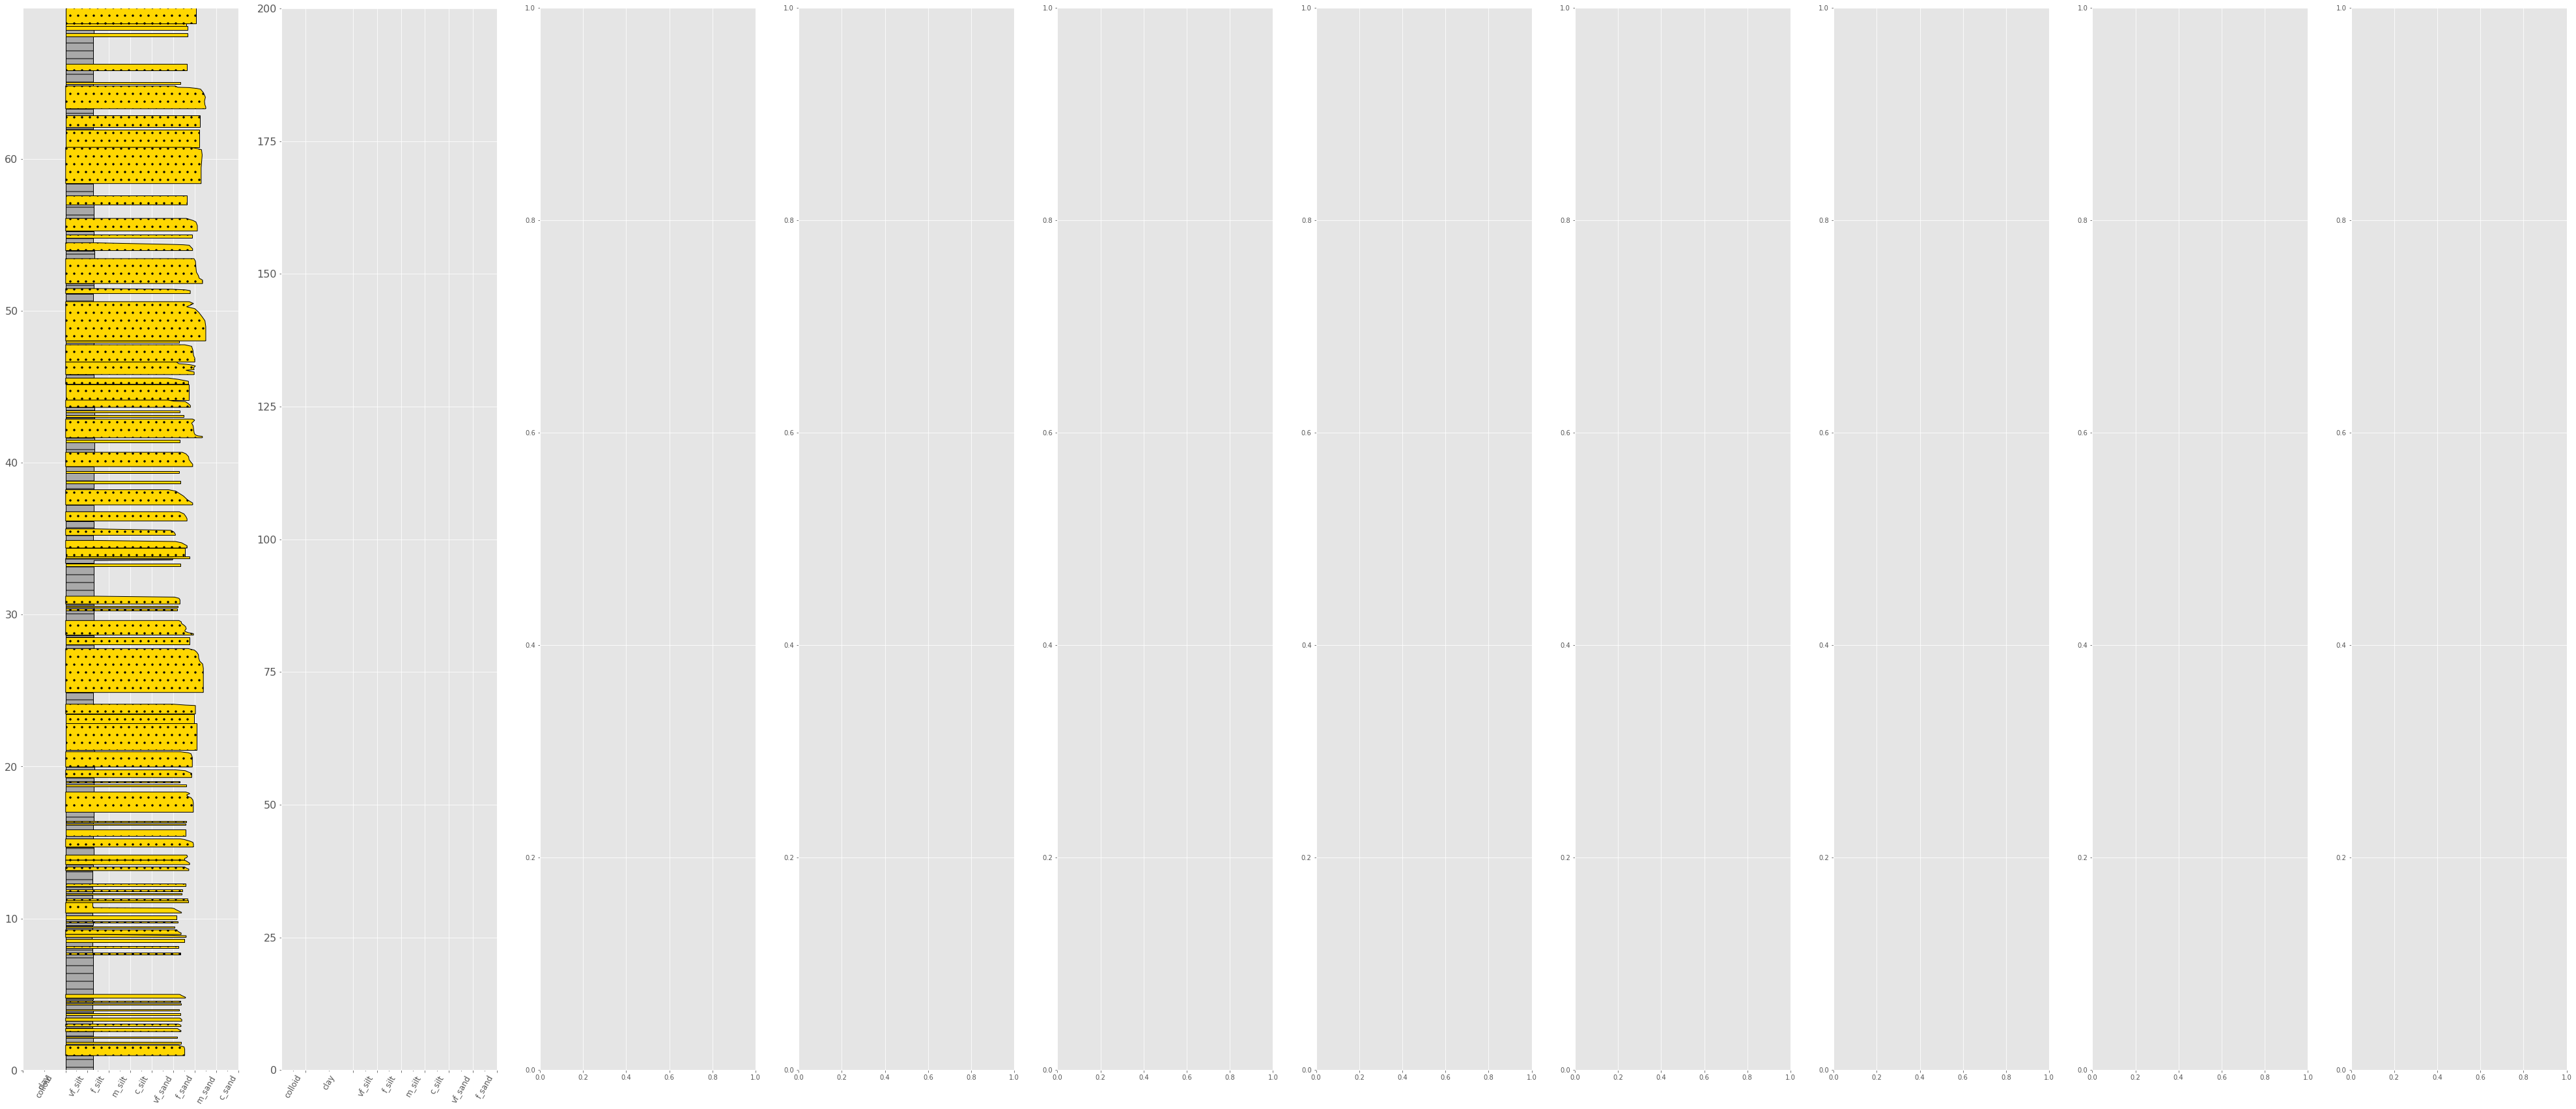

In [12]:
import random

for i, seqs in enumerate([eod0, eod1, eod2, eod3]):
    selected = random.sample(seqs, 10)
    fig, axes = plt.subplots(ncols=10, figsize=(70, 30))
    for ax, seq in zip(axes, seqs):
        #seq.resample_data('depth_m', 0.01)
        seq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax)
    
    plt.show()
    

In [22]:
eod0[1].metadata

{'name': 'Magellan 1320A',
 'collection': 'Gulf of Mexico',
 'eod': 'basin plain',
 'eodnum': 0}

In [23]:
x = beds[beds.name == 'Magellan 1320A']
x #[x.th.between(2.1, 2.2)]

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm,grain_size_psi,mean_gs_psi
3379,Magellan 1320A,67,Gulf of Mexico,basin plain,0,0.00000,2.16803,0.001000,0.0,0.001000,0.001000,0.284765,0.025316,[],"[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
3380,Magellan 1320A,67,Gulf of Mexico,basin plain,0,2.26382,0.37711,0.009893,0.0,0.009893,0.009893,0.284765,0.025316,"[2.26382, 2.64093]","[0.009892528, 0.009892528]","[-6.659445041026761, -6.659445041026761]",-6.659445
3381,Magellan 1320A,67,Gulf of Mexico,basin plain,0,2.64093,3.34637,0.001000,0.0,0.001000,0.001000,0.284765,0.025316,"[2.64093, 5.9873]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
3382,Magellan 1320A,67,Gulf of Mexico,basin plain,0,5.98730,1.22544,0.009467,0.0,0.009467,0.009467,0.284765,0.025316,"[5.9873, 7.21274]","[0.009466878, 0.009466878]","[-6.7228955544825935, -6.7228955544825935]",-6.722896
3383,Magellan 1320A,67,Gulf of Mexico,basin plain,0,7.21274,7.35263,0.123396,1.0,0.123396,0.123396,0.284765,0.025316,"[7.21274, 14.56537]","[0.1233958, 0.1233958]","[-3.0186348043083826, -3.0186348043083826]",-3.018635
3384,Magellan 1320A,67,Gulf of Mexico,basin plain,0,14.56537,0.32992,0.001000,0.0,0.001000,0.001000,0.284765,0.025316,"[14.56537, 14.89529]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
3385,Magellan 1320A,67,Gulf of Mexico,basin plain,0,14.89529,0.47126,0.124883,1.0,0.124883,0.124883,0.284765,0.025316,"[14.89529, 15.36655]","[0.1248831, 0.1248831]","[-3.001349839685703, -3.001349839685703]",-3.001350
3386,Magellan 1320A,67,Gulf of Mexico,basin plain,0,15.36655,0.28280,0.001000,0.0,0.001000,0.001000,0.284765,0.025316,"[15.36655, 15.64935]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
3387,Magellan 1320A,67,Gulf of Mexico,basin plain,0,15.64935,0.42423,0.123396,1.0,0.123396,0.123396,0.284765,0.025316,"[15.64935, 16.07358]","[0.1233958, 0.1233958]","[-3.0186348043083826, -3.0186348043083826]",-3.018635
3388,Magellan 1320A,67,Gulf of Mexico,basin plain,0,16.07358,0.32992,0.001000,0.0,0.001000,0.001000,0.284765,0.025316,"[16.07358, 16.4035]","[0.001, 0.001]","[-9.965784284662087, -9.965784284662087]",-9.965784
